## A simple effect: Delay


### Implementing delay

The simplest delay function will create a copy of the input, add some silence to the beginning of the copy, and combine it with the original input. 

In [1]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (9,4)
#%config InlineBackend.figure_format = 'svg'
from IPython.display import Audio

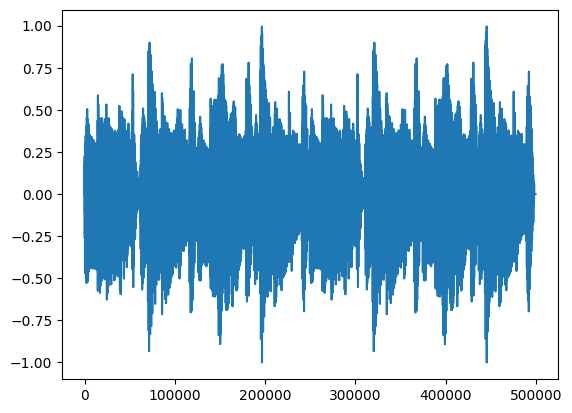

In [17]:
(fs,x) = read('../audio/AcousticGuitar.wav')
#Normalize between -1 and 1:
data = x/abs(x).max()
plt.plot(data)

In [18]:
copy = data.copy()

Let's **zero-pad** the original signal and the copied signal so they have the same length

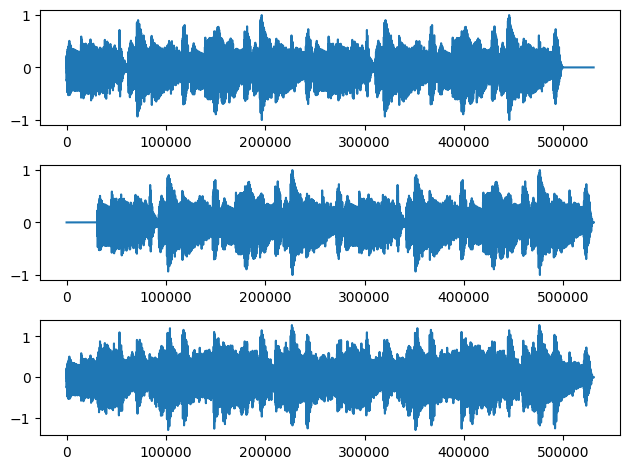

In [20]:
#time in ms to delay by
offset = 700
#create number of samples equal to 700ms under the given sampling rate
pad = np.zeros(int(fs/1000*offset))
orig = np.concatenate([data,pad])
delay = np.concatenate([pad,copy])
new_s = orig+delay
plt.subplot(3,1,1)
plt.plot(orig)
plt.subplot(3,1,2)
plt.plot(delay)
plt.subplot(3,1,3)
plt.plot(new_s)
plt.tight_layout()

In [21]:
Audio(orig, rate=fs)

In [22]:
Audio(new_s, rate=fs)

To make this sound more like a realistic echo, we can change the volume of the delayed audio by scaling the amplitude on the delay (copy) file.

In [24]:
delay2 = delay*.5
new_s2 = orig+delay2
Audio(new_s2, rate=fs)

In [26]:
#time in ms to delay by
offset = 350 # started at 700
#create number of samples equal to N ms under the given sampling rate
pad = np.zeros(int(fs/1000*offset))
orig = np.concatenate([data,pad])
delay = np.concatenate([pad,copy])
new_s = orig+delay
Audio(new_s,rate=fs)

Another enhancement to the delay function is to allow for multiple repeats. 
Each time a repeat occurs, we can opt to scale the volume of each repeat (or not).

Let's try 3 repeats each with a 1000ms delay:

In [28]:
#First delay
#time in ms to delay by
offset = 1000
#create silence equal to number of samples equal to 1000ms under the given sampling rate
pad = np.zeros(int(fs/1000*offset))
#orig = np.concatenate([data,pad])
orig = np.concatenate([copy,pad,pad,pad])
delay1 = np.concatenate([pad,copy,pad,pad])
delay2 = np.concatenate([pad,pad,copy,pad])
delay3 = np.concatenate([pad,pad,pad,copy])
new_s = orig+(delay1*.5)+(delay2*.25)+(delay3*.125)
Audio(new_s,rate=fs)

Notice that the process of padding and concatenating can easily be turned into an iterative process...

In [32]:
iters = []
repeats = 3
for i in range(repeats+1):
    offset = 1000
    #create some silence
    pad_beg = np.zeros(int(fs/1000*offset*i))
    pad_end = np.zeros(int(fs/1000*offset*(repeats-i)))
    # add to the original starting from first delay
    delay=np.concatenate([pad_beg,copy,pad_end])
    iters.append(delay)
newnew_s = np.sum(np.array(iters),axis=0)

Or, better, without any loops:

In [33]:
import numpy as np
a = np.arange(10)
np.roll(a,2)

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
repeats = 3
offset = 700
pad = np.zeros(int(fs/1000*offset))
delay = np.concatenate([copy, np.tile(pad, 3)])
delay += np.roll(delay, pad.size)

In [35]:
Audio(delay, rate=fs)